In [2]:
import yfinance as yf
from datetime import datetime
import numpy as np


vti = yf.Ticker("VTI")
vti.info

{'phone': '800-523-1036',
 'longBusinessSummary': 'The fund employs an indexing investment approach designed to track the performance of the index, which represents approximately 100% of the investable U.S. stock market and includes large-, mid-, small-, and micro-cap stocks. It invests by sampling the index, meaning that it holds a broadly diversified collection of securities that, in the aggregate, approximates the full index in terms of key characteristics.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 285.05,
 'open': 286.12,
 'dayLow': 284.47,
 'dayHigh': 286.175,
 'regularMarketPreviousClose': 285.05,
 'regularMarketOpen': 286.12,
 'regularMarketDayLow': 284.47,
 'regularMarketDayHigh': 286.175,
 'trailingPE': 26.879717,
 'volume': 2194431,
 'regularMarketVolume': 2194431,
 'averageVolume': 2837335,
 'averageVolume10days': 2312730,
 'averageDailyVolume10Day': 2312730,
 'bidSize': 1000,
 'askSize': 1000,
 'yield': 0.013200001,
 'totalAssets': 1751564681216,
 'fiftyTwoWeek

In [3]:
end_date = datetime.now().strftime('%Y-%m-%d')
h = vti.history(period='max', end=end_date, interval='1d')
h.index = h.index.tz_convert(None)

h

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2001-06-15 04:00:00,36.427087,36.808283,36.262779,36.584824,1067400,0.0,0.0,0.0
2001-06-18 04:00:00,36.683398,36.749123,36.351498,36.351498,282600,0.0,0.0,0.0
2001-06-19 04:00:00,36.903570,36.913428,36.302202,36.453365,1777600,0.0,0.0,0.0
2001-06-20 04:00:00,36.394229,36.854292,36.394229,36.837860,476000,0.0,0.0,0.0
2001-06-21 04:00:00,36.805009,37.281501,36.722855,37.133625,240400,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-10-18 04:00:00,288.700012,289.260010,287.910004,288.890015,1822100,0.0,0.0,0.0
2024-10-21 04:00:00,288.510010,288.799988,286.640015,287.980011,2320100,0.0,0.0,0.0
2024-10-22 04:00:00,286.899994,288.250000,286.470001,287.649994,2029000,0.0,0.0,0.0


In [4]:

r = h.rolling(window=30).mean().Close
d = h.Close - r
idxsell = d.idxmax()
print(f"Up {100.0 * (h.loc[idxsell].Close - r[idxsell]) / h.loc[idxsell].Close:.2f}% or {d[idxsell]:.2f}$ on {idxsell}.")

idxbuy = d.idxmin()
print(f"Down {- 100.0 * (h.loc[idxbuy].Close - r[idxbuy]) / h.loc[idxbuy].Close:.2f}% or {d[idxbuy]:.2f}$ on {idxbuy}.")


Up 7.07% or 14.73$ on 2022-08-15 04:00:00.
Down 33.79% or -35.16$ on 2020-03-23 04:00:00.


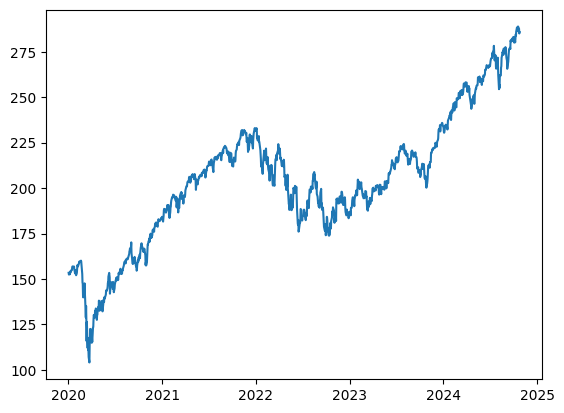

In [5]:
import matplotlib.pyplot as plt
import numpy as np

span = h['2020-01-01':]
plt.plot(span.index, span.Close)
plt.show()


In [6]:
for timestamp in h.head(3).index:
    print(timestamp.strftime('%Y-%m-%d'))



h[h.index > np.datetime64('2024-01-01')]

2001-06-15
2001-06-18
2001-06-19


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-01-02 05:00:00,233.275235,234.126569,232.404113,233.255447,4847600,0.0,0.0,0.0
2024-01-03 05:00:00,232.166502,232.374392,230.760814,231.018188,3925500,0.0,0.0,0.0
2024-01-04 05:00:00,230.909308,232.186316,230.315363,230.424255,3681900,0.0,0.0,0.0
2024-01-05 05:00:00,230.354956,232.027927,230.057976,230.770721,3305100,0.0,0.0,0.0
2024-01-08 05:00:00,230.919208,234.176046,230.909299,234.067154,4156600,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-10-18 04:00:00,288.700012,289.260010,287.910004,288.890015,1822100,0.0,0.0,0.0
2024-10-21 04:00:00,288.510010,288.799988,286.640015,287.980011,2320100,0.0,0.0,0.0
2024-10-22 04:00:00,286.899994,288.250000,286.470001,287.649994,2029000,0.0,0.0,0.0


/tmp/ipykernel_4233/666940856.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_value = h.iloc[-1:].Close[0]


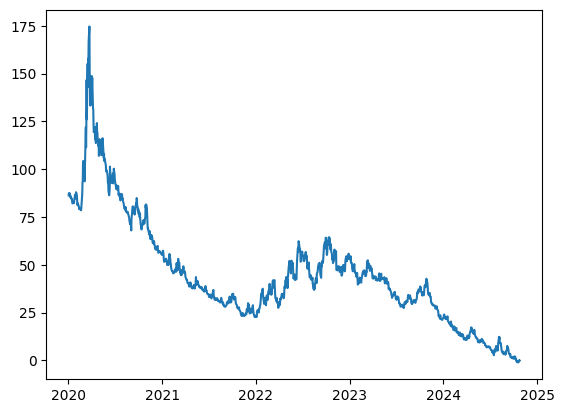

In [7]:


def with_returns(since: np.datetime64 = None):
    end_value = h.iloc[-1:].Close[0]
    ret = 100.0 * (end_value - h.Close) / h.Close
    if since:
        return h[h.index >= since].copy().join(ret.rename('Returns'))
    else:
        return h.copy().join(ret.rename('Returns'))
    
x = with_returns(np.datetime64('2020-01-01'))
plt.plot(x.index, x.Returns)
plt.show()


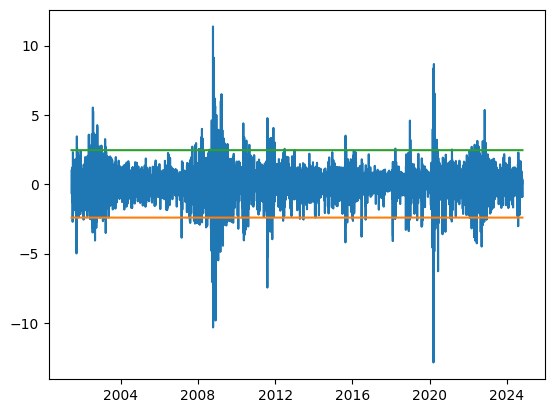

np.float64(0.02762990484326903)

In [8]:
def cycle_count():
    change = 100.0 * (h.Close - h.shift(1).Close) / h.Close
    return h.copy().join(change.rename('Change'))

x = cycle_count()
minstd = x.Change.mean() - 2 * x.Change.std()
maxstd = x.Change.mean() + 2 * x.Change.std()
plt.plot(x.index, x.Change, 
         x.index, np.repeat(minstd, len(x)),
         x.index, np.repeat(maxstd, len(x)))
plt.show()

x.Change.mean()

In [9]:
import math

def balance(target: float, initial_cash: float, bound=.25, verbose=True):
    price = h.iloc[0].Close
    stock = math.floor((1.0 - target) * initial_cash / price)
    cash = initial_cash - stock * price
    if verbose:
        print(f"${cash + stock * price:,.2f}: {stock} shares @ ${price:.2f} and ${cash:.2f} {100.0 * cash / (cash + stock * price):.2f}%")
    for ts, row in h.shift(-1).iterrows():
        if np.isnan(row.Close):
            break
        price = row.Close
        new_total = cash + stock * price
        if cash / new_total < (1.0 - bound) * target:
            target_cash = target* new_total
            sell = math.floor((target_cash - cash) / price)
            if sell > 0:
                stock -= sell
                cash += sell * price
                if verbose: 
                    print(f"{ts} SOLD   {sell} => ${cash + stock * price:,.2f}: {stock} shares and ${cash:.2f}")
        elif cash / new_total > (1.0 + bound) * target:
            target_cash = target * new_total
            buy = math.floor((cash - target_cash) / price)
            if buy > 0:
                stock += buy
                cash -= buy * price
                if verbose:
                    print(f"{ts} BOUGHT {buy} => ${cash + stock * price:.2f}: {stock} shares and ${cash:.2f}")
    if verbose:
        print(f"${cash + stock * price:,.2f}: {stock} shares @ ${price:,.2f} and ${cash:.2f} {100.0 * cash / (cash + stock * price):.2f}%")
    return cash + stock * price

balance(0.2, 10000.0)

$10,000.00: 218 shares @ $36.58 and $2024.51 20.25%
2002-07-17 04:00:00 BOUGHT 15 => $8024.22: 233 shares and $1611.68
2004-11-10 05:00:00 SOLD   13 => $10,787.49: 220 shares and $2123.64
2007-05-18 04:00:00 SOLD   12 => $14,158.08: 208 shares and $2780.06
2008-10-03 04:00:00 BOUGHT 14 => $10955.17: 222 shares and $2229.82
2008-11-18 05:00:00 BOUGHT 15 => $8799.80: 237 shares and $1785.90
2009-12-11 05:00:00 SOLD   14 => $11,959.32: 223 shares and $2386.86
2012-09-13 04:00:00 SOLD   13 => $15,914.56: 210 shares and $3175.47
2014-06-30 04:00:00 SOLD   12 => $21,176.89: 198 shares and $4204.12
2017-11-27 05:00:00 SOLD   11 => $28,067.15: 187 shares and $5529.85
2020-08-31 04:00:00 SOLD   11 => $36,923.23: 176 shares and $7376.52
2024-01-19 05:00:00 SOLD   10 => $49,291.89: 166 shares and $9758.07
$57,202.53: 166 shares @ $285.81 and $9758.07 17.06%


np.float64(57202.531160354614)

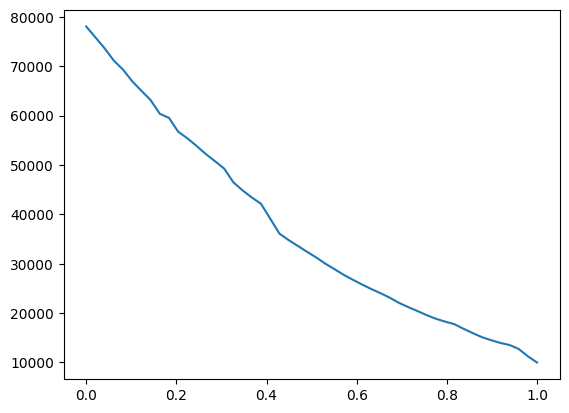

In [10]:
# Plot return vs targtet ratio (cash / total) 
def balance_by_ratio():
    scope = np.linspace(0, 1.0, 50)
    plt.plot(scope, np.array([balance(target, 10000.0, verbose=False) for target in scope]))

balance_by_ratio()


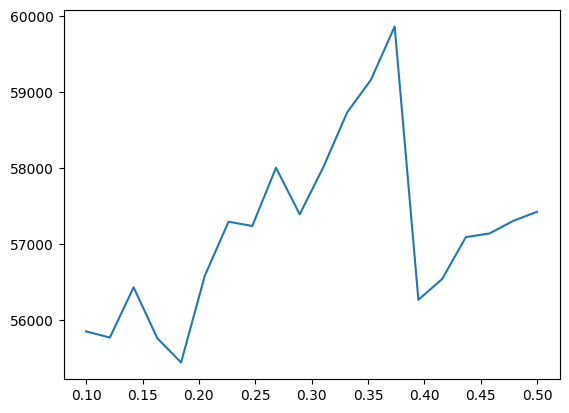

In [11]:
# Plot return vs bound for a target ratio of 20% cash
def balance_by_bound():
    scope = np.linspace(0.1, 0.5, 20)
    plt.plot(
        scope, np.array([balance(0.2, 10000.0, bound, verbose=False) for bound in scope]),
    )

#balance_by_ratio()
balance_by_bound()


In [12]:
import pandas as pd
size = len(h)
buy = [10, 0, 10, 0, 10]
x = pd.Series( buy + [ 0 ] * (size - len(buy)), name='Buy', index=h.index)

out = pd.concat([h, x], axis=1)
(out.Buy * out.Close)


Date
2001-06-15 04:00:00    365.848236
2001-06-18 04:00:00      0.000000
2001-06-19 04:00:00    364.533653
2001-06-20 04:00:00      0.000000
2001-06-21 04:00:00    371.336250
                          ...    
2024-10-18 04:00:00      0.000000
2024-10-21 04:00:00      0.000000
2024-10-22 04:00:00      0.000000
2024-10-23 04:00:00      0.000000
2024-10-24 04:00:00      0.000000
Length: 5877, dtype: float64

In [31]:
vti.info
vti.dividends

goog = yf.Ticker('GOOG')
t = goog.get_history_metadata()['firstTradeDate']
datetime.fromtimestamp(t)

goog


yfinance.Ticker object <GOOG>